## Johnson's Algorithm

In [1]:
import graphviz as gv
import numpy as np

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [2]:
%%file johnson.txt
3|2
0|6 2|3
0|4 3|5
1|-7 2|-3

Writing johnson.txt


[[None, 3, 1, 0], [1, None, 1, 0], [2, 3, None, 2], [1, 3, 1, None]]


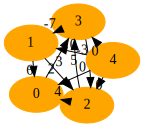

In [4]:
import SSSP as sp
def Johnson(graph):
    n = len(graph)
    graph.append([(i,0) for i in range(n)])
    _, cost = sp.BellmanFord(graph,n)
    if cost == None:
        return None
    gprime = [[] for _ in range(n)]
    for v in range(n):
        for u, w in graph[v]:
            gprime[v].append((u,w + cost[v] - cost[u]))
    totalPath = []
    for v in range(n):
        path, _ = sp.Dijkstra(gprime,v)
        totalPath.append(path)
    return totalPath
graph, _ = readAdjl("johnson.txt",weighted=True)
print(Johnson(graph))
adjlShow(graph,directed=True,weighted=True)

In [9]:
import Heap as hp
def Solution(graph):
    n = len(graph)
    pq = hp.Heap(lambda a,b: a[0] < b[0])
    visited = [[False]*n for _ in range(n)]
    path = [[None]*n for _ in range(n)]
    pq.push((0,0,0))
    maximum = 0
    while pq.Size() > 0:
        maxElevation, i,j = pq.pop()
        if not visited[i][j]:
            visited[i][j] = True
            if i == n - 1 and j == n - 1:
                maximum = maxElevation
                break
            adj = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
            for ri, ci in adj:
                if ri >= 0 and ri < n and ci >= 0 and ci < n and not visited[ri][ci]:
                    path[ri][ci] = (i,j)
                    pq.push((max(maxElevation,graph[ri][ci]),ri,ci))
    res = [[0]*n for _ in range(n)]
    rr = n - 1
    cr = n - 1
    while path[rr][cr] != None:
        res[rr][cr] = 1
        pi, pj = path[rr][cr]
        rr = pi
        cr = pj
    res[rr][cr] = 1
    return maxElevation, res
matrix = [[0,1,3],
          [2,4,1],
          [1,2,1]]
matrix3 = [[0,1,2,3,4],
           [24,23,22,21,5],
           [12,13,14,15,16],
           [11,17,18,19,20],
           [10,9,8,7,6]]
maximum, result  = Solution(matrix3)
print(maximum)
n = len (result)
for i in range(n):
    print(result[i])
import heapq
heapq.heappop()

16
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 1]
[1, 1, 1, 1, 1]
[1, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
